<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>October 20, 2023</center>

---

# <center><ins>TP Class N°2 - HVS perception and colors</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 26 October 2023, 23h59**.
* <font color=red>The name of the file you upload should be **TP2_name_surname.ipynb**.</font>
* If you need to include attached files to you TP, please archive them together in a folder named **TP2_name_surname.zip**.

### Exercise 1 : 

*(1 point)*

**(a)** What are the main components of the HVS as an optical system? What are the characteristics and limits of each of its components?

The main components of the HVS as an optical system are:
- Retina which contains two types of photoreceptors :
    - 100 millions of rods which are distributed over all Retina. They are responsible of the vision in dark environment. However, they are limited because they do not provide a good and precise vision.
    - 6.5 millions of cones. They are mostly packed in Fovea (a small region of retina...), and they work in well-lighted environment. They provide us a high resolution and color vision. However, they don't work in dark environment.
- Pupil which acts as small imaging aperture and it size is varying from 2 to 8 mm.
- Lens which determines the aperture focusing.
- Iris whick is the muscle that controls the pupil size.

**(b)** How does the human eye sense colors? What are the main qualities of achromatic and
chromatic light?

An human eye sense colors thanks to its cones, which are only sensitive to relatively high intensity light.

There are 3 types of cones.

- L-cones: they are sensitive to high-wavelength (it corresponds to the red color). There is about 65% of L-cones.
- M-cones: they are sensitive to medium-wavelength (it corresponds to the green color). There is about 33% of M-cones.
- S-cones: they are sensitive to short-wavelength (it corresponds to the blue color). There is about 2% of S-cones, but they are very sensitive.

Chromatic light is with colors (in the visible spectrum 380-700nm) and is characterized by 3 quantities:
- Radiance: it's a total amount of energy emmited by a source of light (measured in watts (W)). Human perception is irrelevant.
- Luminace: it's a measure of the amount of energy that an observer perceives from the light source. We can consider it as filtered by the HVS (lumens) (see previous slides)
- Brigtness: it's a subjective evaluation/sensation of the source of radiation.

Acromatic light is with no colors and is characterized by the intensity (or amount) of light. It varies from black (no light) to white (very bright light). The intermediate level is gray.

---

### Exercise 2 : 
*(1 point)*

**(a)** What is the NTSC-YIQ color space? What is the main domain of application for this
color system? What is its advantage against RGB from an application point of view ?

YIQ is the color space used by NTSC, an American standard for analog color TV system, used including in the North and Central America, and in Japan. It's main domain of application is the TV system.
This color space was created for allow the color TV and the black-and-white TV, still used in the past, to visualise videos and images.
It's advantage against RGB is that a black-and-white TV can visualize images and videos in grayscale thanks to the Y component (the Y component is like the image RGB in grayscale). So it's an advantage to have just one format to print images and videos on color and black-and-white TV systems.  


**(b)** Write a function that takes an RGB image and converts it to the NTSC-YIQ format.
Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert
the RGB image *mnms.jpg* to the NTSC-YIQ using your function. Display each three
components as individual gray images. Explain the meaning of each component. 

*NB : If you use the matplotlib library to display grayscale images, pay attention to the
color maps (cmap) you are using or you might end up with strange coloured results.*

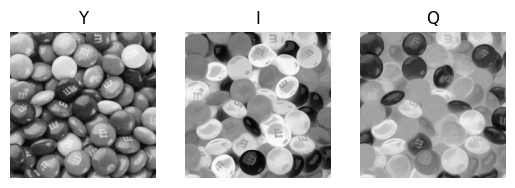

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk

# This function is used for print an image, with a title
def print_image(image: np.ndarray, title: str):
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

# This function is used to print a list of images in a subplot. Each image will be visualised component by component. We can assign a new size for our subplot.
def print_image_subplot(images: list[np.ndarray], titles: list[str], row=1, column=3):    
    index = 0
    plt.figure()
    for i in range(row):
        for j in range(column):
            plt.subplot(row, column, index + 1)
            plt.imshow(images[i][..., j], cmap='gray')
            plt.axis('off')
            plt.title(titles[index])
            index += 1
    plt.show()

# This function is used for the conversion from one color space to another color space with a matrix
def convert_image(image: np.ndarray, convert: np.ndarray) -> np.ndarray:
    shape = image.shape
    image = image.reshape(-1, 3)
    image = convert @ image.T
    return image.T.reshape(shape)

# Here we open the image
image = plt.imread('./mnms.jpg', 'r')/255

# Here we define the matrix for the convertion to do after.
convert_YIQ = np.array([
    [0.299, 0.587, 0.114],
    [0.596, -0.274, -0.322],
    [0.211, -0.523, 0.312]])

convert_YCbCr = np.array([
    [0.299, 0.587, 0.114],
    [-0.14713, -0.28886, 0.436],
    [0.615, -0.51499, -0.10001]])

# Here we convert image to YIQ color space and we print all of his components
print_image_subplot([convert_image(image, convert_YIQ)], ["Y", "I", "Q"])

- The Y component represents luma component (intensity in the chromatic TV)
- The I component represents orange-blue range of colors
- The Q component represents purple-green range of colors


**(c)** Apply python function *skimage.color.rgb2yiq* to the RGB image *mnms.jpg*. Compare the obtained result with the result of your function and explain the visual differences, if any.

I found that there is no difference between the two results obtained...

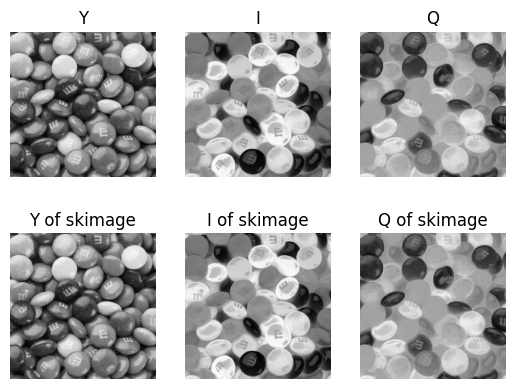

In [28]:
converted_image = sk.color.rgb2yiq(image)

print_image_subplot([convert_image(image, convert_YIQ), converted_image], ["Y", "I", "Q", "Y of skimage", "I of skimage", "Q of skimage"], row=2, column=3)

**(d)** Use the python function *skimage.color.yiq2rgb* to convert the image back to RGB. Compute the MSE between the result image and the original one. Is this color system transformation lossless or lossy?

In [29]:
def MSE(image_1: np.ndarray, image_2: np.ndarray):
    return np.linalg.norm((image_1 - image_2))

newimage = sk.color.yiq2rgb(converted_image)

print(MSE(image, newimage))

1.7964187697321732e-13


As the MSE distance is very little between the two images, we can say that this transformation is lossless because the two images are very similar... In fact, we can consider that $10^{-13}$ is obtained instead of 0 because of the precision of the machine. So the transformation is lossless.

---

### Exercise 3 :
*(1 point)*

Redo Exercise 3 **(a)–(d)** for the YCbCr color system. 

**(a)** What is the YCbCr color space? What is the main domain of application for this
color system? What is its advantage against RGB from an application point of view ?

YCbCr is a digital “equivalent” of YUV, a color space used by PAL color TV system including in a large parth of Europe and in China. YCbCr is used in digital formats JPEG and MPEG. It is very similar to NTSC-YIQ, but it has a bigger range of colors than NTSC-YIQ. So it keep the same advantage of YIQ against RGB, because it also allows to print images in color and black-and-white TV systems thanks to the Y component, and the quality is better than NTSC-YIQ because of the bigger range of colors.

**(b)** Write a function that takes an RGB image and converts it to the YCbCr format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the YCbCr using your function. Display each three components as individual gray images. Explain the meaning of each component.

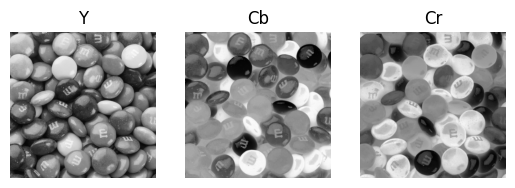

In [30]:
print_image_subplot([convert_image(image, convert_YCbCr)], ["Y", "Cb", "Cr"])

- Y represents luma component (it's not an equi-proportional sum of RGB)
- Cb represents blue difference component
- Cr represents red difference component

**(c)** Use *skimage.color.rgb2ycbcr* to convert the RGB image *mnms.jpg* to the YCbCr format. Compare the obtained result with the result of your function and explain the visual differences, if any.

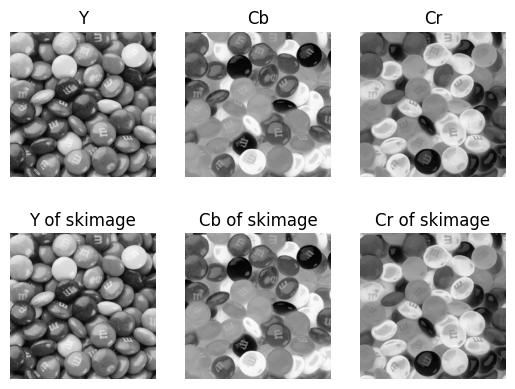

In [2]:
converted_image = sk.color.rgb2ycbcr(image)

print_image_subplot([convert_image(image, convert_YCbCr), converted_image], ["Y", "Cb", "Cr", "Y of skimage", "Cb of skimage", "Cr of skimage"], row=2, column=3)

I found that there is no difference between the two results obtained

**(d)** Use *skimage.color.ycbcr2rgb* to convert the image back to RGB. Compute the MSE between the result image and the original one. Is this color system transformation lossless or lossy?

In [3]:
newimage = sk.color.ycbcr2rgb(converted_image)
print(MSE(image, newimage))

2.0470042072859857e-13


As the MSE distance is very little between the two images, we can say that this transformation is lossless because the two images are very similar... In fact, we can consider that $10^{-13}$ is obtained instead of 0 because of the precision of the machine. So the transformation is lossless.

---

### Exercise 4 : 

*(1 point)*

Redo Exercise 3 **(a)**, **(b)** and **(d)** for the CMY color system.

*NB: You will need however to write your own function cmy2rgb for part (d).*

**(a)** What is the CMY color space? What is the main domain of application for this
color system? What is its advantage against RGB from an application point of view ?

The CMY color space is a color space used in printer. It's a substractive color model, so the primary colors are Cyan, Magenta and Yellow. It's advantage against RGB from an application point of view is that for printing colors on paper, RGB don't allow us to recreate all the colors while the CMY model allows it.

**(b)** Write a function that takes an RGB image and converts it to the CMY format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the CMY using your function. Display each three components as individual gray images. Explain the meaning of each component.

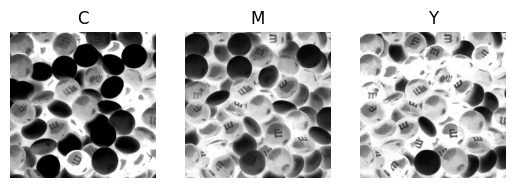

In [36]:
def convert_rgb2cmy(image: np.ndarray) -> np.ndarray:
    return 1 - image


converted_image = convert_rgb2cmy(image)

print_image_subplot([converted_image], ["C", "M", "Y"])

- C: represent cyan component. It is the complementary color of Red
- M: represent magenta component. It is the complementary color of Green
- Y: represent yellow component. It is the complementary color of Blue

**(d)** Write a function that takes a CMY image and converts it to the RGB format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the CMY image *mnms.jpg* to the RGB using your function. Display each three components as individual gray images. Explain the meaning of each component.

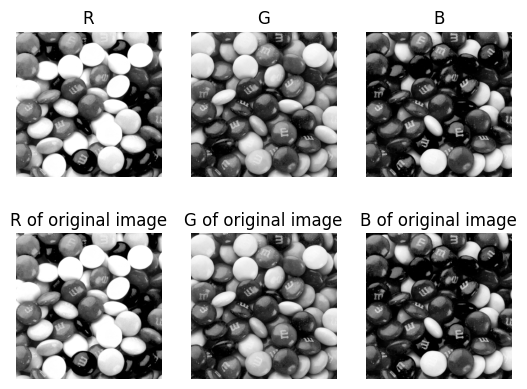

In [39]:
print_image_subplot([convert_rgb2cmy(converted_image), image], ["R", "G", "B", "R of original image", "G of original image", "B of original image"], 2, 3)

- R: represent red component. It is the complementary color of cyan
- G: represent green component. It is the complementary color of magenta
- B: represent blue component. It is the complementary color of yellow

---

### Exercise 5 : 

*(1 point)*

**(a)** Explain the difference between the CMY and CMYK color spaces.

In fact, the CMYK color space is obtained thanks to the CMY color space. It add another component to the CMY color space: the K (black) component.
The CMYK color space was created because a perfect combinaison of Cyan, Magenta and Yellow don't give us a perfect black especially in printer domain. And the paper did not necessarily support three layers of colors (for create black color in substractive model). So the CMYK color space was created to have a more beautifull black thanks to the K component, including in printer domain.

Redo Exercise 4 **(b)** and **(d)** for the CMYK color space.

**(b)** Write a function that takes an RGB image and converts it to the CMYK format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the CMYK using your function. Display each four components as individual gray images. Explain the meaning of each component.

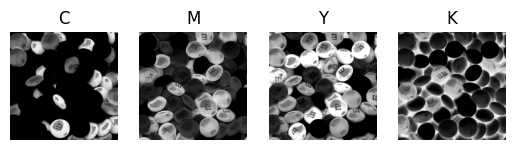

In [40]:
def rgb2cmyk(image: np.ndarray) -> np.ndarray:
    image = convert_rgb2cmy(image)
    K = np.min(image, axis=2)
    C = image[..., 0] - K
    M = image[..., 1] - K
    Y = image[..., 2] - K
    (h, w, _) = image.shape
    image = np.stack((C, M, Y, K))
    return image.transpose(1, 2, 0)

print_image_subplot([rgb2cmyk(image)], ["C", "M", "Y", "K"], 1, 4)

- K is the black component of the image. It is the minimum of C, M and Y component for each pixel.
- C: represent the difference between cyan component and K component
- M: represent the difference between magenta component and K component
- Y: represent the difference between yellow component and K component

**(d)** Write a function that takes a CMYK image and converts it to the RGB format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the CMYK image *mnms.jpg* to the RGB using your function. Display each three components as individual gray images. Explain the meaning of each component.

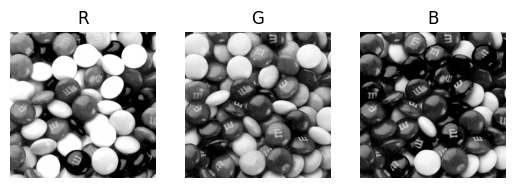

In [42]:
def cmyk2rgb(image: np.ndarray) -> np.ndarray:
    K = image[..., 3]
    C = image[..., 0] + K
    M = image[..., 1] + K
    Y = image[..., 2] + K
    image = np.stack((C, M, Y)).transpose(1, 2, 0)
    return convert_rgb2cmy(image)

print_image_subplot([cmyk2rgb(rgb2cmyk(image))], ["R", "G", "B"], 1, 3)

It's like in the (d) of exercise 4:
- R: represent red component. It is the complementary color of cyan
- G: represent green component. It is the complementary color of magenta
- B: represent blue component. It is the complementary color of yellow

---

### Exercise 6 :

(1 point)

**(a)** Outline the primary focusing disorders in the human visual system (HVS). Detail current solutions for each. Organize the information in a schematic format.

*Hint: emmetropia, myopia, hypermetropia, astigmatism*

--- Write your answer here ---

In the HVS, there are some problems
- emmetropia: the eye has no refraction problems. The subject have a good vision.
- myopia: the eye can't make the focusing on distant objects, because the curvature is not strong enough . So the image  caused by a distant object will be formed before the retina, that's why the vision is trouble for distant objects, but clear for near objects. It's caused by the courbe of the eye which is too stip. For fix this, the subject can wear concave glasses.
- hypermetropia: it's a problem in the refraction of the light by the eye because it curvature is too strong enough, and the image is formed after the retina... So the eyes can't have a nice vision near and far. To fix it, the subject can compensate for the disorder by making an effort to accommodate it. But the hypermetropia can be detected more late with the presbyopia, which is a problem because the eye is too tired in a unreturnable way. The subject can also wear convex glasses, or lens, or make refractive surgery.
- astigmatism: the cornea is not well formed, so the subject can't see good near and far. For correct this problem, the subject must wear glasses or contact lens.

**(b)** Compare focusing mechanisms in the human visual system (HVS) and contemporary cameras. Highlight the key differences.

An human eyes is essentially composed of a lens and a retina (Exercise 1 (a)...)

In a contemporary cameras, we also have a lens, and we have a plane where the image is formed.

An human eyes will have the retina fixed at one distance of the lens, and it's the lens which varies to focus the image on the plane, while an optical system has the lens which can't vary, and it's the distance between the lens and the plane which varies to focus the image on the plane.

So the main difference is that the lens of the eye can varies to change the focal distance, whereas the lens of the camera can't do it. So to focus an image in a camera, whe must change the distance between the camera and the plane.